# 회귀 소개
- 데이터 값이 평균과 같은 일정한 값으로 돌아가련느 경향을 이용한 통계학 기법
- 규제에 따라 여러 가지 유형
- 규제 : 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 페널티 값을 적용

# 회귀 종류
## 일반 선형 회귀
- 예측값과 실제 값의 RSS(Residual Sum of Suqres)를 최소화할 수 있도록 회귀 계수를 최적화혀며, 규제를 적용하지 않은 모델
## Ridge
- L2 규제 추가
- 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
## Lasso
- L1 규제 추가
- 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 선택되지 않도록 함
- 피처 선택 기능!
## Elastic net
- L2+L1
- 주로 피처가 많은 데이터 세트에 적용
- L1규제로 피처의 개수를 줄이고, L2 규제로 계수 값의 크기를 조정.

# Gradient Descent
## RSS
- Residual Sum of Square = $Error^2$
- $RSS(w_0,w_1) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (w_0+w_1*x_i))^2$
- Rss 는 cost이며, w변수 로 구성되는 Rss를 비용함수라고 함
- cost function이 반환하는 값(오류)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것!

## 알고리즘 설명
- 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W파리미터를 구하는 방식
- 오류 값이 더이상 작아지지 않을때까지
- 모든 학습 데이터에 대해 반복적으로 cost function을 최소화하기 위한 업데이트 -> 수행시간 오래 걸림
## 알고리즘 step
- Step 1. $w_1, w_0$ 을 임의의 값으로 설정하고 첫 cost function 계산
- Step 2. update $w_1=w_1 - \eta * \frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i - 예측값_i), w_2=w_2 - \eta * \frac{2}{N}\sum_{i=1}^{N}(실제값_i - 예측값_i)$. cost function 다시 계산($\eta$ : learning rate)
- Step 3. cost function이 감소하였으면, Step2반복. 더이상 감소하지 않을때까지

## 단순회귀 example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

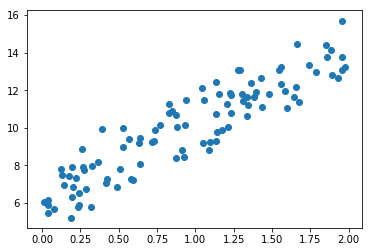

In [4]:
np.random.seed(0)

#shape : (100,1)
X = 2*np.random.rand(100,1) #uniform distribution over [0, 1)
y = 6+4*X+np.random.randn(100,1) #Return a sample (or samples) from the “standard normal” distribution.

plt.scatter(X,y)

In [7]:
#업데이트를 진행하는 함수
def get_weight_updates(w1, w0, X,y, learning_rate = 0.01) :
    N = len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1.T)+w0
    diff = y - y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [9]:
def gradient_descent_steps(X,y, iters = 10000) :
    
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X,y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
        
    return w1,w0

In [10]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [14]:
w1,w0 = gradient_descent_steps(X,y,iters = 1000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X+w0

print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


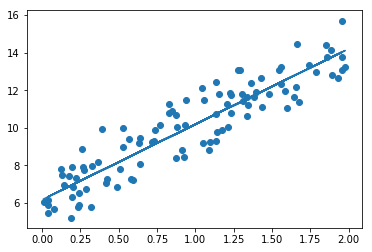

In [15]:
plt.scatter(X,y)
plt.plot(X, y_pred)

# Stochastic Gradient Descent
- 확률적 경사 하강법
- 일부 데이터만 이용해 w가 업데이트 되는 값을 계산 -> 빠른 속도
## 단순회귀 example

In [31]:
def stochastic_gradient_descent_steps(X,y, batch_size = 10, iters = 1000) :
    
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters) :
        np.random.seed(ind)
        
        #permutation(n) : 0-n숫자 랜덤하게 리턴
        stochastic_random_index = np.random.permutation(X.shape[0])
        
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update
        
    return w1, w0

In [36]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters = 1000)
print('w1 : ', round(w1[0][0],3), 'w0 : ', round(w0[0][0],3))

y_pred = w1[0][0]*X+w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1 :  4.028 w0 :  6.156
Stochastic Gradient Descent Total Cost : 0.9937


# OLS
## Linear Regression Class
##### fit_intercept (default : True) : intercept를 계산할지 말지
##### normalize(default : False) : True이면, 회귀를 수행하기 전 정규화.

- 피처의 독립성에 많은 영향을 받음
- 피처간 상관과계가 매우 높으면, 분산이 커져서 오류에 매우 민감해진다. (다중공선성)

## 평가 지표
##### $MAE = \frac{1}{n}\sum_{i=1}^{n}\left\vert y_i-\hat{y_i} \right\vert$
- 실제 값과 예측값의 차이를 절댓값을 취하고, 평균
- metrics.mean_absolute_error / 'neg_mean_absolute_error'

##### $MSE = \frac{1}{n}\sum_{i=1}^{n}( y_i-\hat{y_i})^2$
- 실제 값과 예측값의 차이를 제곱해 평균
- metrics.mean_squared_error / 'neg_mean_squared_error'

##### $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}( y_i-\hat{y_i})^2}$
- MSE가 실제 오류 평균보다 더 커지는 특성이 있으므로, sqrt!

##### $R^2 = \frac{SSR}{SST} = \frac{예측값 variance}{실제값 variance}$
- metrics.r2_score / 'r2'

# Boston House Price Prediction Example

In [37]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [38]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['price'] = boston.target

print('Boston data shape : ', boston_df.shape)

Boston data shape :  (506, 14)


In [40]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [46]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [50]:
import warnings
warnings.filterwarnings('ignore')

## plot

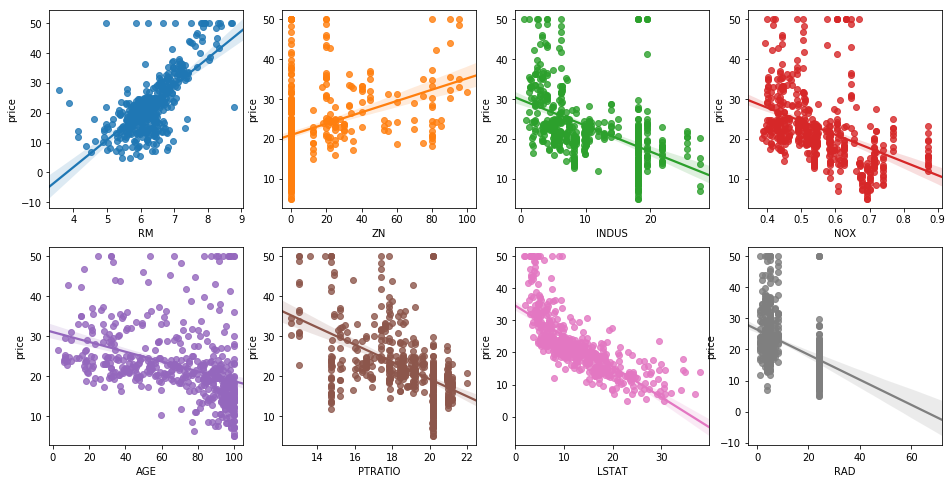

In [51]:
#axs 는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features) :
    row = i//4
    col = i%4
    
    #regplot : 산점도와 선형 회귀 직선을 함께 그려줌
    sns.regplot(x = feature, y = 'price', data = boston_df, ax = axs[row][col])
    

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['price']
X_data = boston_df.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

## fitting

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}, R-square : {2:.3f}%'.format(mse, rmse, r2_score(y_test, y_pred)))


MSE : 17.297, RMSE : 4.159, R-square : 0.757%


In [57]:
print('intercept : ', lr.intercept_)
print('coefficient : ', np.round(lr.coef_,1))

intercept :  40.995595172164336
coefficient :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [58]:
coeff = pd.Series(data = np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

## cross_validation
- cross_val_score()를 사용할 때, score가 높을수록 좋음.
- 따라서 'neg_mean_squared_error'는 mse에 -1을 곱하여 점수가 커질수록 좋게 설정.

In [60]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5) #alwqys negative
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds average RMSE : ', avg_rmse)

5 folds RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds average RMSE :  5.828658946215808
